# Data modelling

This notebook contains the code used in modelling the data.

## 1. Import Libraries and Dataset

Importing the necessary python libraries into the notebook:

In [66]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats



from sklearn.preprocessing import MinMaxScaler

Loading main dataset from CSV file located on my computer:

In [67]:
df = pd.read_csv("ready.csv")

In [68]:
df.head(2)

,rating_score,votes,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,...,yellow floral,longevity,sillage,spring,summer,autumn,winter,gender_man,gender_unisex,gender_women
0,4.1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.50,2.40,0.11,0.11,0.44,0.33,0.0,0.0,1.0
1,4.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.83,2.12,0.37,0.16,0.16,0.32,0.0,0.0,1.0


In [71]:
df[['rating_score', 'votes', 'longevity', 'sillage', 'summer', 'winter']].corr()

,rating_score,votes,longevity,sillage,summer,winter
rating_score,1.000000,0.003634,0.240438,0.173874,-0.150728,0.179637
votes,0.003634,1.000000,0.087904,-0.012486,-0.050350,0.078589
longevity,0.240438,0.087904,1.000000,0.622586,-0.396283,0.399765
sillage,0.173874,-0.012486,0.622586,1.000000,-0.333341,0.349855
summer,-0.150728,-0.050350,-0.396283,-0.333341,1.000000,-0.799275
winter,0.179637,0.078589,0.399765,0.349855,-0.799275,1.000000


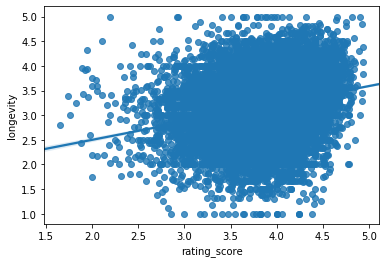

In [72]:
sns.regplot(df['rating_score'], df['longevity'])

## First correlation matrix

In [40]:
first_corr_matrix = df.corr()

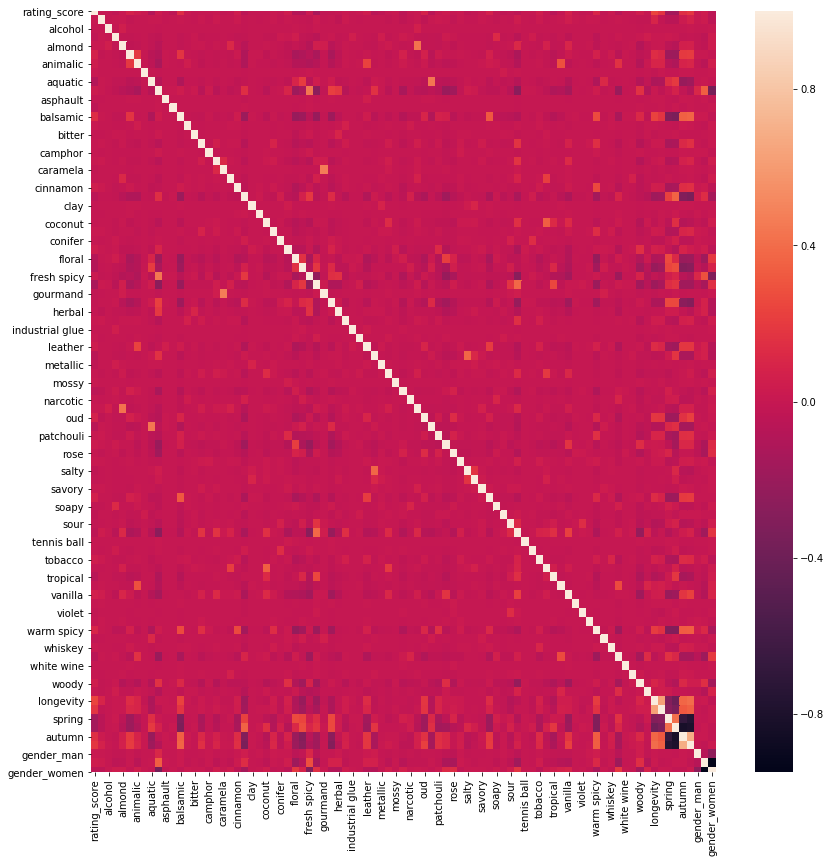

In [41]:
plt.figure(figsize=(14,14))
ax = sns.heatmap(first_corr_matrix)

In [42]:
top_corr = first_corr_matrix['rating_score'].abs().sort_values(ascending=False)[1:6]
top_corr

longevity    0.240438
winter       0.179637
sillage      0.173874
spring       0.150863
summer       0.150728
Name: rating_score, dtype: float64

In [43]:
bottom_corr = first_corr_matrix['rating_score'].abs().sort_values(ascending=True)[1:6]
bottom_corr

vinyl              0.000164
terpenic           0.000343
industrial glue    0.000733
narcotic           0.001004
cacao              0.001375
Name: rating_score, dtype: float64

## Data Preparing

### Data spliting

In [44]:
X = df.drop('rating_score', axis = 1)
y = df[['rating_score']]

Spliting my data in train and test datasets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [46]:
print("My training set is: ", X_train.shape)
print("My test set is: ", X_test.shape)
print("My training dependent variable is: ", y_train.shape)
print("My test dependent variable is: ", y_test.shape)

My training set is:  (14948, 86)
My test set is:  (3737, 86)
My training dependent variable is:  (14948, 1)
My test dependent variable is:  (3737, 1)


Spliting my train data in train and validation datasets

In [47]:
X_train_f, X_validation, y_train_f, y_validation = train_test_split(X_train, y_train, test_size = 0.20, random_state = 1)

In [48]:
print("My final training set is: ", X_train_f.shape)
print("My validation set is: ", X_validation.shape)
print("My training dependent variable is: ", y_train_f.shape)
print("My test dependent variable is: ", y_validation.shape)

My final training set is:  (11958, 86)
My validation set is:  (2990, 86)
My training dependent variable is:  (11958, 1)
My test dependent variable is:  (2990, 1)


## Data scalling

Most of features are in the same range: 0-1.
    
Looking for "outliers":

In [49]:
for i in df.columns:
    if (df[i].min() != 0.0) | (df[i].max() > 1.0):
        print(i)
        print(df[i].min())
        print(df[i].max())

rating_score
1.65
4.94
votes
20.0
11188.0
longevity
1.0
5.0
sillage
1.0
4.0
autumn
0.01
0.92


Four of them: rating_score, votes, longevity and sillage need to be scaled.

('autumn' is the range)

Scaling these variables using MinMaxScaler()

In [50]:
mms = MinMaxScaler()

In [51]:
X_train_f[['votes','longevity','sillage']] = mms.fit_transform(X_train_f[['votes','longevity','sillage']])

/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [52]:
X_validation[['votes','longevity','sillage']] = mms.transform(X_validation[['votes','longevity','sillage']])

/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [53]:
X_test[['votes','longevity','sillage']] = mms.transform(X_test[['votes','longevity','sillage']])

/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



All features from the dataset are in the same range: 0 to 1.

## Data modelling

In [54]:
lin_reg = LinearRegression()

In [55]:
lin_reg.fit(X_train_f, y_train_f)
initial_score = lin_reg.score(X_train_f, y_train_f)


parameters = lin_reg.coef_   # -> shape: (1,86)
intercept = lin_reg.intercept_ # -> (1,)


In [56]:
X_train_f_y_pred = lin_reg.predict(X_train_f)

In [57]:
mse = mean_squared_error(y_train_f, X_train_f_y_pred)

In [58]:
mae = mean_absolute_error(y_train_f, X_train_f_y_pred)

In [59]:
print("The initial R-Squared value for the linear model is:", initial_score.round(4))
print("The Mean Squared Error for the linear model is:", mse.round(4))
print("The Mean Absolute Error for the linear model is:", mae.round(4))

The initial R-Squared value for the linear model is: 0.0929
The Mean Squared Error for the linear model is: 0.1378
The Mean Absolute Error for the linear model is: 0.2839


### Lasso Model

In [60]:
from sklearn.linear_model import Lasso

In [61]:
lasso = Lasso(.30)

In [62]:
lasso.fit(X_train_f, y_train_f)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
lasso.score(X_train_f, y_train_f)

0.0

In [64]:
print('The R-Squared value for the lasso model is:', lasso.score(X_train_f, y_train_f))
print('The Mean Squared Error for the lasso model is:', mean_squared_error(y_train_f, lasso.predict(X_train_f)).round(4))
print('The Mean Absolute Error for the lasso model is', mean_absolute_error(y_train_f, lasso.predict(X_train_f)).round(4))

The R-Squared value for the lasso model is: 0.0
The Mean Squared Error for the lasso model is: 0.1519
The Mean Absolute Error for the lasso model is 0.301


### Model Ridge

In [97]:
from sklearn.linear_model import Ridge

In [98]:
ridge = Ridge()

In [99]:
ridge.fit(X_train_f, y_train_f)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [111]:
print('The R-Squared value for the ridge model is:', ridge.score(X_train_f, y_train_f).round(4))
print('The Mean Squared Error for the ridge model is:', mean_squared_error(y_train_f, ridge.predict(X_train_f)).round(4))
print('The Mean Absolute Error for the ridge model is', mean_absolute_error(y_train_f, ridge.predict(X_train_f)).round(4))

The R-Squared value for the ridge model is: 0.0943
The Mean Squared Error for the ridge model is: 0.1376
The Mean Absolute Error for the ridge model is 0.2836


### So far, Ridge model has the highest R^2 value so this can be a final model.


Next part is "under construction"

In [112]:
## 3. Looking for a multicolinearity

In [113]:
#df_before = df
#X1 = sm.tools.add_constant(df_before)
#series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index = X1.columns)

In [114]:
#print('DATA BEFORE')
#print('_'*100)
#display(series_before.sort_values(ascending=False)[1:10]) 

In [116]:
#There is a multicolinearity between season's and gender's variables. 
#It can mean that users voting for winter, voted for autumn as well.
#And voting for summer, voted for spring as well.
#After removing 'autumn' and 'spring', there are no issues with multicolinearity with this dataset.
#Left variables are easy to understand: seasons are split between hot(summer) and cold(winter).

#The same situation is with gender_man and gender_unisex.
#After removing gender_unisex, there is no no issues with multicolinearity

In [117]:
#df_after = df.drop(['spring', 'autumn', 'gender_unisex'], axis = 1)
#X2 = sm.tools.add_constant(df_after)
#series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index = X2.columns)

In [118]:
#print('DATA AFTER')
#print('_'*100)
#display(series_after.sort_values(ascending=False)[1:10]) 